In [152]:
from scipy.optimize import minimize
import numpy as np
from ryPat_Optimization_01 import *

def f(x):
    x1 = x[0]
    x2 = x[1]
    return -2**(((x1-5)**2 + (x2-5)**2)/25)
def c1(x):
    return x[0] + x[1] -1
def c2(x):
    return -x[0] + 2*x[1] -2
def c3(x):
    return -(x[0] + 3*x[1]-9)

x0 = [0,0]
#print(objective(x0))
xyBounds = [(-5, 5),
       (-5, 5)]

con1 = {'type': 'ineq', 'fun': cons1}
con2 = {'type': 'ineq', 'fun': cons2}
con3 = {'type': 'ineq', 'fun': cons3}
Constraints = [con1, con2, con3]

In [153]:
sol = minimize(f, x0, method='SLSQP', bounds=xyBounds, constraints=Constraints)

In [154]:
sol

     fun: -6.062866266041571
     jac: array([2.68957347, 0.33619666])
 message: 'Optimization terminated successfully'
    nfev: 15
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([-3.,  4.])

Objective function: f()=-2**((x - 5)**2/25 + (y - 5)**2/25)


Constraints: c() >= 0
c()= x + y - 1,-x + 2*y - 2,-x - 3*y + 9
xyBounds:  [xmin, xmax] [ymin, ymax]
[(-5, 5), (-5, 5)]


optimum= 
     fun: -6.062866266041593
     jac: array([2.68957359, 0.33619678])
 message: 'Optimization terminated successfully'
    nfev: 12
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([-3.,  4.])


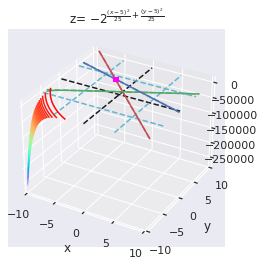

In [156]:
ryOptimization(f, c1,c2,c3, xyBounds)

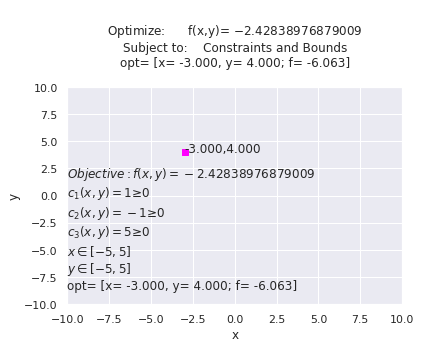

In [163]:
import scipy.optimize as sopt
import matplotlib.pyplot as pl
import sympy as sm

opt= sopt.minimize(
    f,
    x0,
    method= 'SLSQP',
    bounds= xyBounds,
    constraints=Constraints
)

opt

#
# 畫 最佳點 opt.x 
#
[(xmin,xmax),(ymin,ymax)]= xyBounds

xopt= opt.x[0]
yopt= opt.x[1]
fopt= opt.fun

ax= pl.axes(xlim=(-10,10),ylim=(-10,10))#, projection='3d')

ax.scatter(
    x= xopt,
    y= yopt, 
    color= 'magenta',
    marker= 's'    
)

ax.text(
    x= xopt, 
    y= yopt,
    s= f'{xopt:.3f},{yopt:.3f}'
)


fLtx=  sm.latex(f([x1,x2]))
c1Ltx= sm.latex(c1([x1,x2]))
c2Ltx= sm.latex(c2([x1,x2]))
c3Ltx= sm.latex(c3([x1,x2]))

titleStr= f'''
Optimize:      f(x,y)= ${fLtx}$
Subject to:    Constraints and Bounds
opt= [x= {xopt:.3f}, y= {yopt:.3f}; f= {fopt:.3f}]
'''

ax.set_title(titleStr)
ax.set_xlabel('x')
ax.set_ylabel('y')

infoStr= f'''
$Objective: f(x,y)= {fLtx}$
$c_1(x,y)= {c1Ltx} ≥ 0$ 
$c_2(x,y)= {c2Ltx} ≥ 0$ 
$c_3(x,y)= {c3Ltx} ≥ 0$
$x \in [{xmin},{xmax}]$ 
$y \in [{ymin},{ymax}]$
opt= [x= {xopt:.3f}, y= {yopt:.3f}; f= {fopt:.3f}]
'''
ax.text(
    x= -10, 
    y= -10,
    s= infoStr
)

pl.show()